In [19]:
N=112
y=1851:1962

In [20]:
D=c(4,5,4,1,0,4,3,4,0,6,3,3,4,0,2,6,3,3,5,4,5,3,1,4,4,1,5,5,
3,4,2,5,2,2,3,4,2,1,3,2,1,1,1,1,1,3,0,0,1,0,1,1,0,0,3,1,
0,3,2,2,0,1,1,1,0,1,0,1,0,0,0,2,1,0,0,0,1,1,0,2,2,3,1,1,
2,1,1,1,1,2,4,2,0,0,0,1,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0)


Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                      Mean    SD Naive SE Time-series SE
(Intercept)_regime1 3.0800 0.287  0.00287       0.003096
(Intercept)_regime2 0.8935 0.113  0.00113       0.001195

2. Quantiles for each variable:

                      2.5%    25%    50%    75% 97.5%
(Intercept)_regime1 2.5411 2.8861 3.0660 3.2705 3.667
(Intercept)_regime2 0.6853 0.8153 0.8895 0.9659 1.130


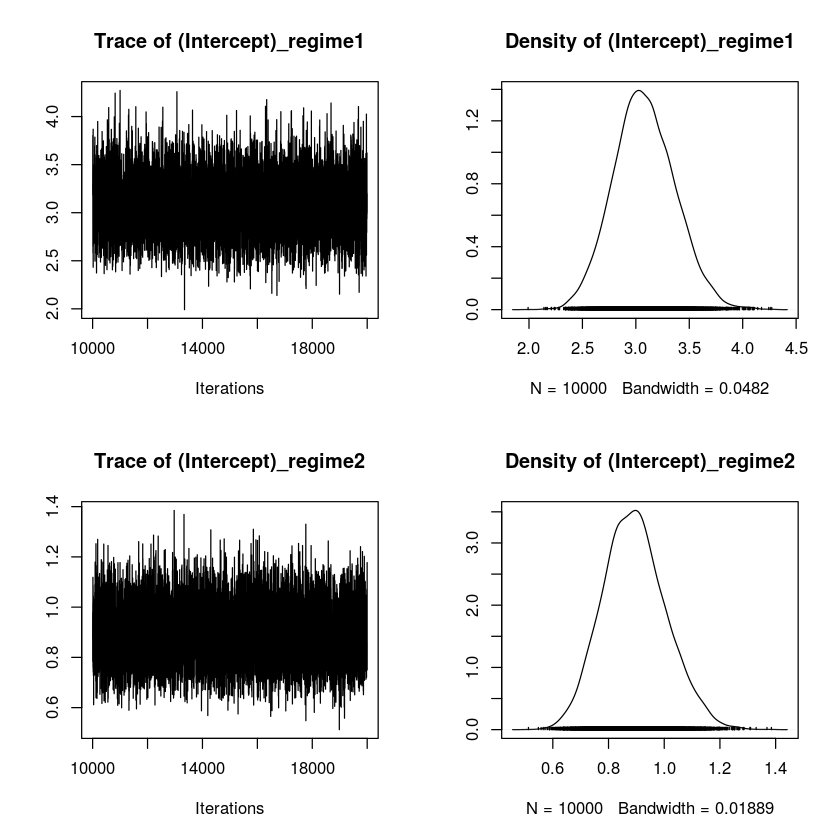

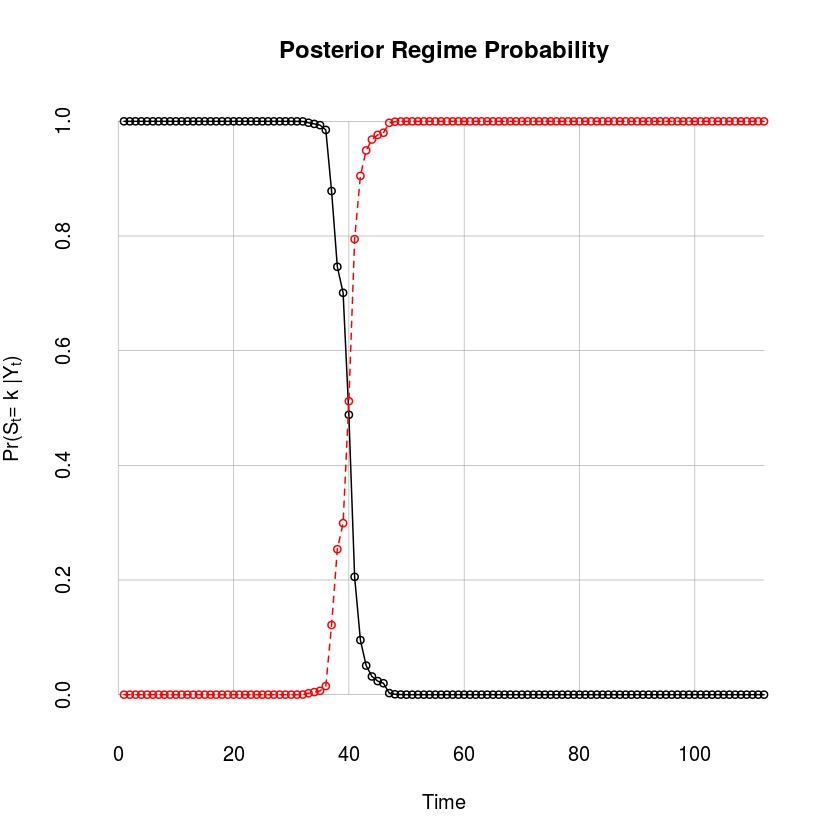

Expected changepoint(s) 


[1] 1890

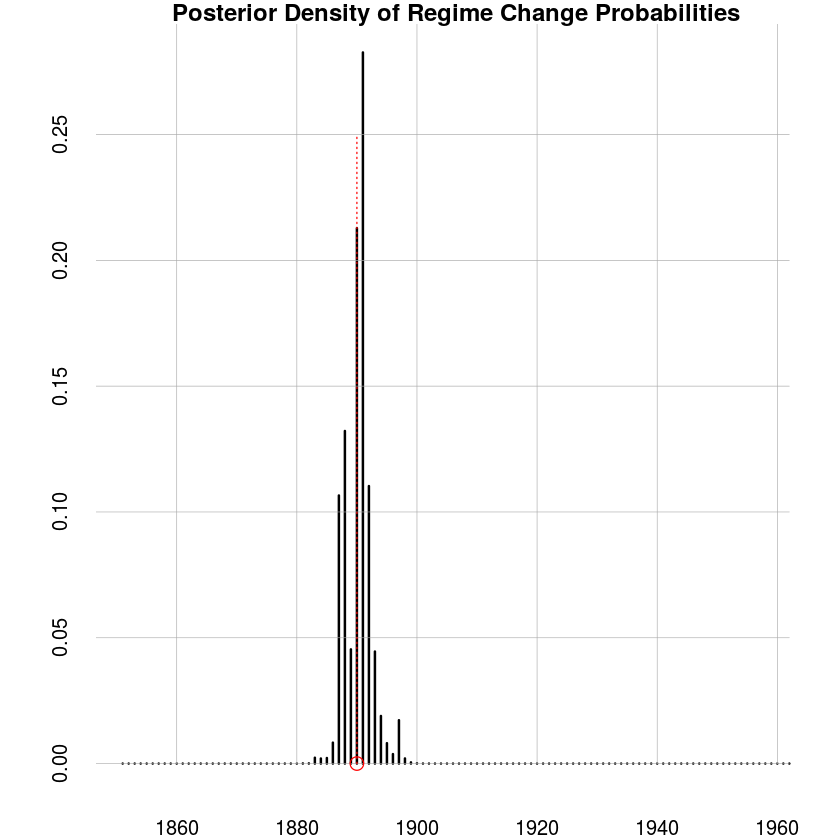

In [21]:
library(MCMCpack)
fit <- MCMCpoissonChange(D ~ 1, m = 1, c0 = 1, d0 = 1,
burnin = 10000, mcmc = 10000,
marginal.likelihood = "Chib95") # bug workaround
plot(fit); par(mfrow=c(1,1))
summary(fit)
plotState(fit)
plotChangepoint(fit, start = 1851)


In [38]:
library(rjags)
inits <- list(list(b = c(0, 0) , changeyear = 50),
list(b = rnorm(2), changeyear = 30),
list(b = rnorm(2), changeyear = 70))
cm.jags <- jags.model("coalmining.jags", inits = inits, n.chains = 3)
coalmining.sim <- coda.samples(cm.jags, c("changeyear","b"), n.iter = 5000)

Compiling model graph
   Resolving undeclared variables
Deleting model



ERROR: Error in jags.model("coalmining.jags", inits = inits, n.chains = 3): RUNTIME ERROR:
Compilation error on line 2.
Cannot evaluate range of counter year




In [34]:
summary(coalmining.sim)

ERROR: Error in summary(coalmining.sim): object 'coalmining.sim' not found


In [37]:
for (j in 1:5) {print(j)}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
